In [17]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import sympy as sp
from IPython.display import *

### Исходные данные:

Основная гипотеза:Выборка получена из закона распределения, совпадающего с распределением η = 1 - √ξ, ξ~R[0;1]

n = 1000

$ D(n, l) = ∑_j \frac{(v_j - np_j)^2}{np_j(n - np_j)}$


### Задание:

Постройте с помощью стохастического эксперимента на основе указанной метрики приближенный критерий для проверки основной гипотезы. Найдите критические значения $D_{кр}$ для трех уровней значимости $ \alpha = 0.1 , 0.05 $ и 0.01.
Протестируйте критерий на двух-трех примерах и сформулируйте выводы. 

#### Смоделируем выборку, подчиняющуюся закону η = 1 - √ξ, ξ~R[0; 1] размером n = 1000, m = 1000 раз

In [18]:
m = 1000
n = 1000

rand = np.random.default_rng()
data = 1 - np.sqrt(rand.random((m , n)))

#### Определим теоретические вероятности попадания случайной величины, распределённой как η, в интервалы.

Для этого необходимо найти функцию распределения η. Значения η определяются значениями ξ. Заметим, что:
$ F_η(x) = P(η ∈ [0; x]) = P(1 - √ξ ∈ [0; x]) = P(ξ ∈ [(1 - x)^2; 0 ]) = 1 - F_ξ((1-x)^2) $

#### Определим функцию, которая подсчитает частоту попадания элементов выборки в заданный интервал и функцию, что возвращает теоретическую вероятность попадания в интервал:

In [19]:
p = lambda j: (2 - 2*j)*0.1

def D (v,n):
    sum = 0
    for j in range(math.trunc(1+math.log(n,2))):
        i = j*0.1 + 0.05
        sum += ((v[j] - n*p(i))**2)/(n*p(i)*(n-n*p(i)))
    return sum

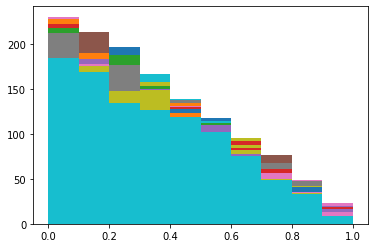

In [20]:
v = []
trunc = math.trunc(1+math.log(n,2))

for i in range(m): 
    (vp, bins_1, patches_1) = plt.hist(data[i],trunc,range = (0,1))
    v.append(vp)

#### Теперь, умея считать теоретические вероятности и частоты, вычислим метрику

$ D(n, l) = ∑_j \frac{(v_j - np_j)^2}{np_j(n - np_j)}$


#### Выведем на печать теоретические частоты:

In [21]:
inter = bins_1
prob = p(inter[0:10] + 0.05)
intervals = ["("+f'{inter[i-1]:.1f}'+";"+f'{inter[i]:.1f}'+"]" for i in range(1, len(inter))]
probabilities = pd.DataFrame([intervals, prob], index = ["Интервал", "Вероятность"])
probabilities

,0,1,2,3,4,5,6,7,8,9
Интервал,(0.0;0.1],(0.1;0.2],(0.2;0.3],(0.3;0.4],(0.4;0.5],(0.5;0.6],(0.6;0.7],(0.7;0.8],(0.8;0.9],(0.9;1.0]
Вероятность,0.19,0.17,0.15,0.13,0.11,0.09,0.07,0.05,0.03,0.01


#### Подсчитаем массив метрик и отрисуем в виде гистограммы подсчитанные метрики:

In [22]:
d = []
for i in range(m): d.append(D(v[i],n))

print("Минимальная вычисленная метрика:" + str(min(d)))
print("Максимальная вычисленная метрика:" + str(max(d)))
print("Размах:" + str(max(d)-min(d)))
print("Количество интервалов по правилу Стёрджеса:" + str(10))

Минимальная вычисленная метрика:0.0010383470500138184
Максимальная вычисленная метрика:0.03274831932758649
Размах:0.03170997227757267
Количество интервалов по правилу Стёрджеса:10


(array([ 60., 224., 338., 168., 119.,  53.,  27.,   6.,   4.,   1.]),
 array([0.00103835, 0.00420934, 0.00738034, 0.01055134, 0.01372234,
        0.01689333, 0.02006433, 0.02323533, 0.02640632, 0.02957732,
        0.03274832]),
 <BarContainer object of 10 artists>)

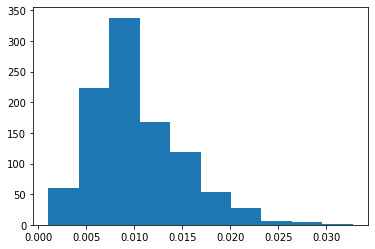

In [23]:
plt.hist(d,math.trunc(1+math.log(m,2)))

#### Найдём критические значения $ D_{кр} $ для трёх уровней значимости: α = 0.1, 0.05, 0.01

Для этого определим эмпирическую функцию распределения $F_{D_{кр}}(x) $ и найдём x, при которых $F_{D_{кр}}(x) $ = [0.9, 0.95, 0.99]

In [24]:
d.sort()
x = [d[900], d[950], d[990]]
x = np.array(x)
alpha = np.array([f'{0.9:.2f}', f'{0.95:.2f}', f'{0.99:.2f}'])
df = pd.DataFrame([x, alpha],["Верхняя граница", "Уровни значимости"])
df

,0,1,2
Верхняя граница,0.0166901,0.0192288,0.0242726
Уровни значимости,0.90,0.95,0.99


#### Теперь применим критерий:

Проверим, что будет, если применить построенный выше критерий к различным выборкам:

1. Рассмотрим выборку, порождённую равномерным законом

In [25]:
rand = np.random.default_rng()
data = rand.random(n)

In [26]:
intervals = ["[" + f'{inter[i-1]:.1f}'+ ";" + f'{inter[i]:.1f}' + "]" for i in range(1, len(inter))]
probs = np.array([inter[i]-inter[i-1] for i in range(1, len(inter))])
pd.DataFrame([intervals, probs], ["Интервалы", "Вероятности"])

,0,1,2,3,4,5,6,7,8,9
Интервалы,[0.0;0.1],[0.1;0.2],[0.2;0.3],[0.3;0.4],[0.4;0.5],[0.5;0.6],[0.6;0.7],[0.7;0.8],[0.8;0.9],[0.9;1.0]
Вероятности,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


Подсчитаем частоты попаданий в интервалы:

,0,1,2,3,4,5,6,7,8,9
Интервалы,[0.0;0.1],[0.1;0.2],[0.2;0.3],[0.3;0.4],[0.4;0.5],[0.5;0.6],[0.6;0.7],[0.7;0.8],[0.8;0.9],[0.9;1.0]
Эмпирические вероятности,80,98,109,104,90,103,103,101,97,115


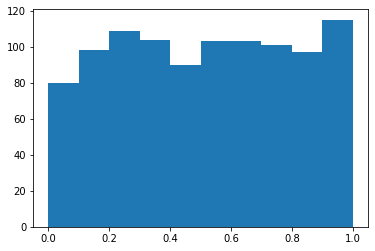

In [27]:
v_1 , bins_1, patches_1 = plt.hist(data,trunc,range = (0,1))
pd.DataFrame([intervals, v_1], ["Интервалы", "Эмпирические вероятности"])

Найдём значение метрики D:

In [28]:
print("D = " + str(D(v_1,n)))
print("D = " + str(D(v_1,n)) + " > " + str(x[0]) + " => отклоняем гипотезу на уровне alpha = 0.1")
print("D = " + str(D(v_1,n)) + " > " + str(x[1]) + "  => отклоняем гипотезу на уровне alpha = 0.05")
print("D = " + str(D(v_1,n)) + " > " + str(x[2]) + " => отклоняем гипотезу на уровне alpha = 0.01")

D = 1.4800565393898548
D = 1.4800565393898548 > 0.01669009063955043 => отклоняем гипотезу на уровне alpha = 0.1
D = 1.4800565393898548 > 0.019228793055050833  => отклоняем гипотезу на уровне alpha = 0.05
D = 1.4800565393898548 > 0.02427259083937356 => отклоняем гипотезу на уровне alpha = 0.01


#### Вывод: данный критерий смог различить равномерное распределение и распределение η = 1 - √ξ.

##### 2. Рассмотрим выборку, порождённую законом η = 1 - √ξ

In [33]:
rand = np.random.default_rng()
data = 1 - np.sqrt(rand.random(n))

In [34]:
probs = p(inter[0:10] + 0.05)
intervals = ["[" + f'{inter[i-1]:.1f}'+ ";" + f'{inter[i]:.1f}' + "]" for i in range(1, len(inter))]
pd.DataFrame([intervals, probs], ["Интервалы", "Вероятности"])

,0,1,2,3,4,5,6,7,8,9
Интервалы,[0.0;0.1],[0.1;0.2],[0.2;0.3],[0.3;0.4],[0.4;0.5],[0.5;0.6],[0.6;0.7],[0.7;0.8],[0.8;0.9],[0.9;1.0]
Вероятности,0.19,0.17,0.15,0.13,0.11,0.09,0.07,0.05,0.03,0.01


,0,1,2,3,4,5,6,7,8,9
Интервалы,[0.0;0.1],[0.1;0.2],[0.2;0.3],[0.3;0.4],[0.4;0.5],[0.5;0.6],[0.6;0.7],[0.7;0.8],[0.8;0.9],[0.9;1.0]
Эмпирические вероятности,175,161,150,132,123,91,76,46,29,17


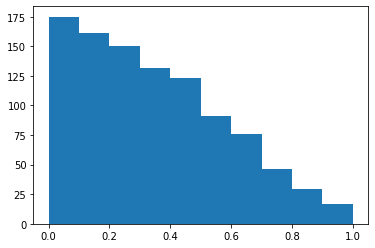

In [35]:
v_2 , bins_2, patches_2 = plt.hist(data,trunc,range = (0,1))
pd.DataFrame([intervals, v_2], ["Интервалы", "Эмпирические вероятности"])

In [36]:
print("D = " + str(D(v_2,n)))
print("D = " + str(D(v_2,n)) + " < " + str(x[0]) + " => принимаем гипотезу на уровне alpha = 0.1")
print("D = " + str(D(v_2,n)) + " < " + str(x[1]) + "  => принимаем гипотезу на уровне alpha = 0.05")
print("D = " + str(D(v_2,n)) + " < " + str(x[2]) + " => принимаем гипотезу на уровне alpha = 0.01")

D = 0.009683574182347967
D = 0.009683574182347967 < 0.01669009063955043 => принимаем гипотезу на уровне alpha = 0.1
D = 0.009683574182347967 < 0.019228793055050833  => принимаем гипотезу на уровне alpha = 0.05
D = 0.009683574182347967 < 0.02427259083937356 => принимаем гипотезу на уровне alpha = 0.01


#### Вывод: полученный критерий дал правильный результат на равномерно распределении и распределении η = 1 - √ξ, что свидетельствует о его применимости.